In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# from tqdm import tqdm

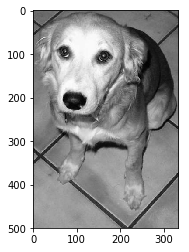

In [4]:
DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [5]:
print(img_array)

[[104 107 110 ... 101 100 100]
 [102 105 108 ... 100  99  99]
 [100 103 107 ... 100  98  97]
 ...
 [146 146 147 ... 150 152 153]
 [146 146 147 ... 149 152 153]
 [147 147 146 ... 149 151 153]]


In [6]:
print(img_array.shape)

(500, 334)


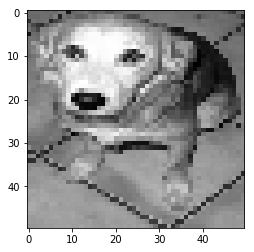

In [7]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

24946


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
1
1
0
1
1


In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 39]
   [ 43]
   [ 35]
   ...
   [ 30]
   [ 15]
   [  9]]

  [[ 42]
   [ 38]
   [ 47]
   ...
   [ 49]
   [ 40]
   [ 10]]

  [[ 43]
   [ 42]
   [ 43]
   ...
   [  1]
   [ 11]
   [  9]]

  ...

  [[182]
   [208]
   [210]
   ...
   [ 84]
   [ 88]
   [ 73]]

  [[202]
   [233]
   [200]
   ...
   [ 87]
   [ 77]
   [ 73]]

  [[237]
   [205]
   [180]
   ...
   [ 87]
   [ 84]
   [ 75]]]]


In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
